In [205]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns


In [206]:
df = pd.read_csv('../Toshiba/WineQT.csv')

In [207]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [208]:
df.shape

(1143, 13)

In [209]:
df.shape[0]

1143

Vi har 1143 datapunkter

In [210]:
df.shape[1]

13

Vi har 13 attributer

In [211]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [212]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# Hur många klasser?

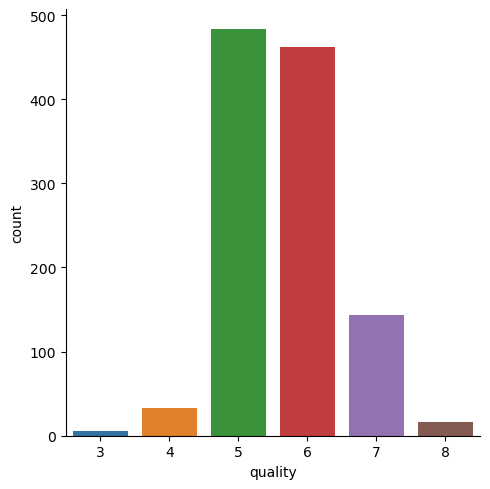

In [213]:
sns.catplot(x='quality' ,data = df, kind='count')

In [214]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Vi har 6 klasser av qualitet mellan 3 och 8

# Fråga nr 3 (distributionen)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>],
       [<AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>]], dtype=object)

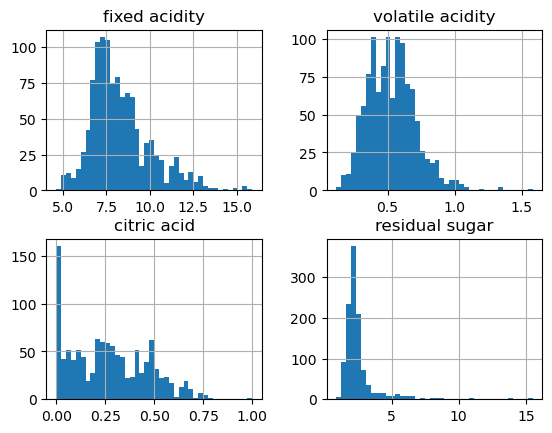

In [215]:
df[['fixed acidity','volatile acidity','citric acid','residual sugar']].hist(bins=40)

array([[<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:>]], dtype=object)

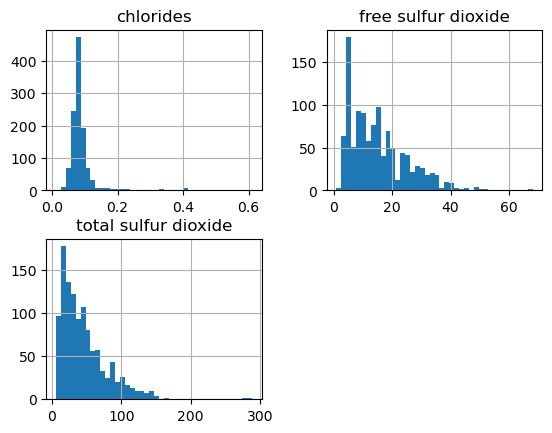

In [216]:
df[['chlorides','free sulfur dioxide','total sulfur dioxide']].hist(bins=40)

array([[<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>, <AxesSubplot:>]],
      dtype=object)

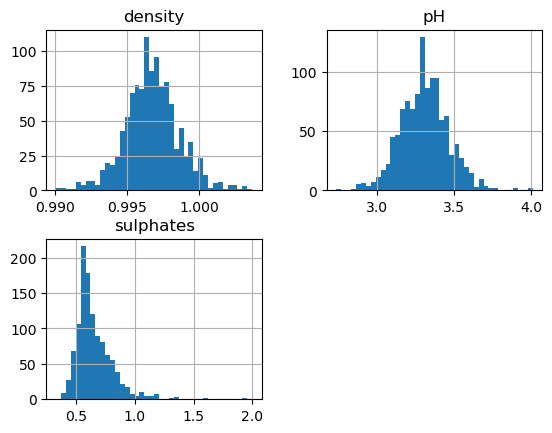

In [217]:
df[['density','pH','sulphates']].hist(bins=40)

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Id'}>, <AxesSubplot:>]],
      dtype=object)

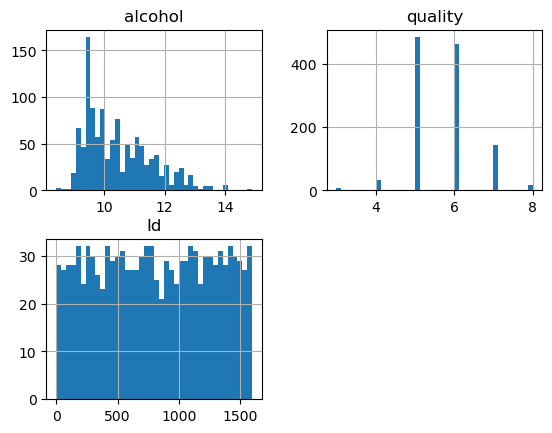

In [218]:
df[['alcohol','quality','Id']].hist(bins=40)

# Frågar nr 4 

Id inte viktigt kolumn, för att den inte kopplat till innehållet

In [219]:
correlation = df.corr()

<AxesSubplot:>

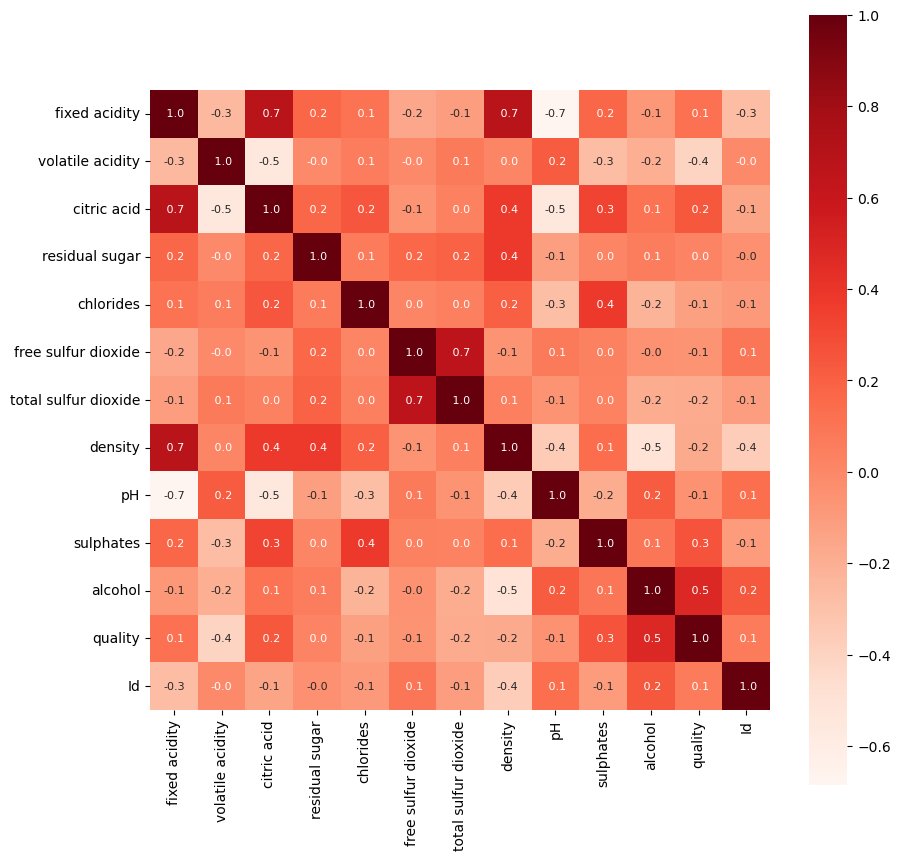

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=' .1f', annot=True,annot_kws={'size':8}, cmap = 'Reds')

Från heatmap vi kan se att alkohol har högsta positiva värde(0.5), det betyder att alkohol har störst påverkan.

# Split dataset

In [221]:
X= df.drop(columns=['Id','quality'])
Y=df['quality']

# Training  & Testing dataset

In [222]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [223]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(800, 11) (343, 11) (800,) (343,)


# Creating and fitting the model

In [232]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth= 3,min_samples_leaf=5)

In [233]:
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=95)

In [234]:
clf_entropy.score(X_train, Y_train)

0.59625

In [235]:
clf_entropy.score(X_test, Y_test)

0.5247813411078717

In [236]:
Y_pred_en= clf_entropy.predict(X_test)
print(Y_pred_en)

[5 5 5 5 7 7 5 5 5 5 7 6 5 6 6 5 6 5 5 7 5 6 5 7 5 5 6 5 5 5 5 5 7 5 5 5 5
 6 7 6 6 5 7 5 5 5 5 6 5 6 6 5 5 5 6 6 6 6 6 5 5 6 5 6 7 5 7 5 5 6 6 5 5 5
 5 5 6 6 6 5 5 5 5 5 5 6 5 5 6 5 5 6 5 5 5 5 5 6 6 5 5 6 5 6 5 5 5 6 6 6 6
 5 5 6 5 5 5 7 6 5 5 5 5 5 5 5 5 5 5 7 5 5 6 5 7 5 5 5 5 6 7 5 5 5 7 5 5 5
 5 5 6 5 6 5 6 6 5 6 6 6 6 5 6 6 5 5 5 6 5 5 6 5 5 5 5 5 6 6 5 5 6 5 5 5 5
 5 6 5 6 5 6 5 6 6 5 5 5 6 7 6 5 6 5 5 5 5 5 5 7 6 5 6 5 5 5 5 6 5 7 5 5 5
 5 6 5 6 5 5 5 6 6 7 5 5 5 7 5 5 6 5 6 6 6 5 5 5 5 5 6 5 5 5 5 5 5 6 7 5 5
 5 5 5 7 5 5 5 6 6 5 6 5 7 5 7 5 5 5 5 5 5 5 6 5 5 6 7 5 5 5 6 6 5 7 5 6 6
 7 5 6 5 5 6 6 5 5 5 6 6 7 5 6 6 6 5 5 5 5 5 5 5 5 6 6 5 5 6 6 5 5 5 7 5 5
 7 5 5 6 5 7 5 5 5 5]


# Depth

In [229]:
clf_entropy.get_depth()

3

Trädet djup är 3

# Number of The Leave

In [230]:
clf_entropy.get_n_leaves()

8

Trädet har 8 löv